<a href="https://colab.research.google.com/github/Prashanna-Raj-Pandit/Neural-Net-Regression/blob/main/02_NN_Regression_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.18.0


# Get Insurance Dataset

In [2]:
# read in the insurane dataset
insurance=pd.read_csv("https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv")
print(insurance.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
insurance['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [ ]:
insurance['bmi'].dtype

dtype('float64')

# One hot encoding our dataframe

In [ ]:
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
insurance_one_hot["sex_female"].dtype

dtype('bool')

In [ ]:
insurance_one_hot["age"]

,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21


In [ ]:
# split dataset
X=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]


In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [ ]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


# create training and testing sets by sklern

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 10342.2871 - mae: 10342.2871
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7710.2324 - mae: 7710.2324
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7660.1182 - mae: 7660.1182
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7728.5527 - mae: 7728.5527
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7377.5762 - mae: 7377.5762
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7672.1704 - mae: 7672.1704
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7575.0312 - mae: 7575.0312
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7818.3032 - mae: 7818.3032
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7649.2515 - mae: 7649.2515
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7601.7822 - mae: 7601.7822
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7636.1206 - mae: 7636.1206
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

In [ ]:
y_pred=insurance_model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Lets evaluate our model

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 6337.9985 - mae: 6337.9985


[6199.62158203125, 6199.62158203125]

In [ ]:
y_train.mean(
)

np.float64(13346.089736364485)

# Improving our model

In [ ]:
tf.random.set_seed(42)

insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=["mae"])
history=insurance_model_2.fit(X_train,y_train,epochs=200,verbose=1)


Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 12566.4951 - mae: 12566.4951
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7513.7935 - mae: 7513.7935
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7233.6802 - mae: 7233.6802
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7019.7305 - mae: 7019.7305
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6749.7329 - mae: 6749.7329
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6415.1553 - mae: 6415.1553
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6256.5366 - mae: 6256.5366
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6123.6523 - mae: 6123.6523
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5986.9155 - mae: 5986.9155
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5802.1846 - mae: 5802.1846
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5560.4678 - mae: 5560.4678
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

In [ ]:
insurance_model_2.evaluate(X_test,y_test
                           )

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3225.7571 - mae: 3225.7571


[3161.88525390625, 3161.88525390625]

#Losss curve or training curve

Text(0.5, 0, 'epochs')

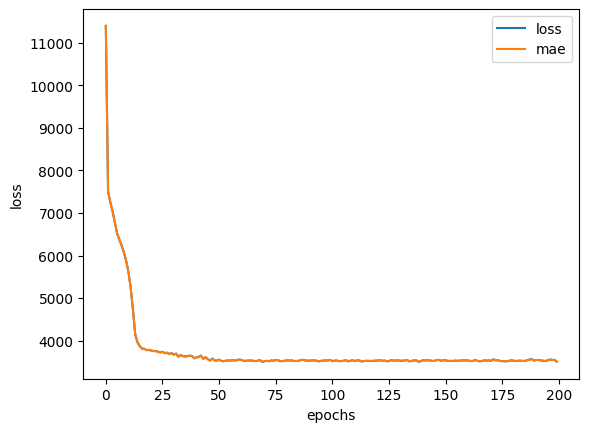

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> So How long do we train for? for this, tensorflow has a solution. i.e. EarlyStoppingCallback which is a tensorflow component which can be add in our model to stop training when our model stop improving after certain metric.

# Preprocessing data. Normalization and standardisation
in terms of scaling values NN prefers normalization
To prepare out data. we can burrow a few classes from sikit-learn


<Axes: ylabel='Frequency'>

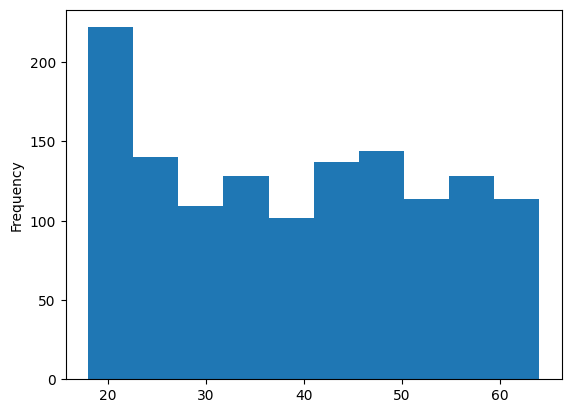

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

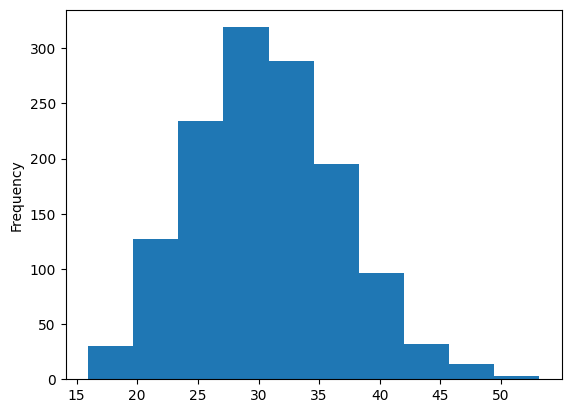

In [ ]:
X["bmi"].plot(kind="hist")

# ColumnTransformer
When creating a ColumnTransformer, its components should be passed as a list of tuples inside the constructor. Each tuple contains:

A name for the transformer (e.g., "scaler" or "onehot").

The transformer object (e.g., MinMaxScaler() or OneHotEncoder()).

The column names to which the transformer should be applied.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Creating a column transformer
ct = ColumnTransformer(
    transformers=[
        ("scaler", MinMaxScaler(), ["age", "bmi", "children"]),  # Scale these columns
        ("onehot", OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])  # One-hot encode these columns
    ]
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer on training data
ct.fit(X_train)

# Transform the training and test data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


## Save the fitted ColumnTransformer

In [ ]:
import pickle
with open("column_transformer.pkl", "wb") as f:
    pickle.dump(ct, f)

In [ ]:
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train.shape,X_train_normal.shape # columns are added by one hot encoder

((1070, 6), (1070, 11))

Our data is normalized and one hot encoded. lets build our neural network based on this data

In [ ]:
tf.random.set_seed(42)
insurance_model_normalized=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_normalized.compile(loss=tf.keras.losses.mae,
                                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                                   metrics=["mae"])
history=insurance_model_normalized.fit(X_train_normal,y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 13261.4639 - mae: 13261.4639
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12173.8301 - mae: 12173.8301
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8465.7715 - mae: 8465.7715
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7607.0957 - mae: 7607.0957
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7151.2700 - mae: 7151.2700
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6564.7319 - mae: 6564.7319
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5706.2915 - mae: 5706.2915
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4527.4795 - mae: 4527.4795
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3728.0588 - mae: 3728.0588
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3638.1663 - mae: 3638.1663
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3625.4922 - mae: 3625.4922
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

Text(0.5, 0, 'epochs')

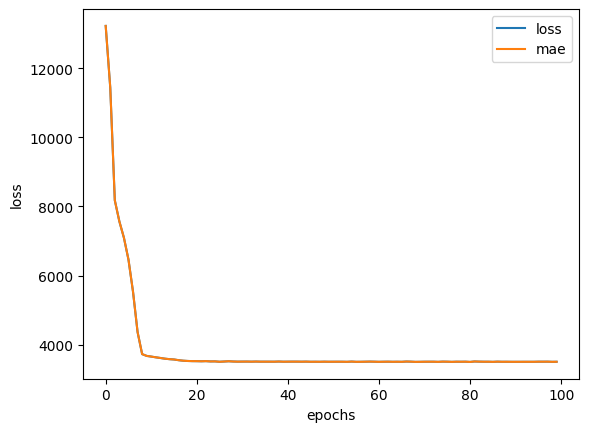

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
insurance_model_normalized.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3213.6387 - mae: 3213.6387


[3161.993896484375, 3161.993896484375]

In [ ]:
X_test_normal[0]

array([0.58695652, 0.24791499, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [ ]:
single_sample = X_test_normal[0].reshape(1, -1)  # -1 infers the size (11)
prediction = insurance_model_normalized.predict(single_sample)
print("Prediction for the first test sample:", prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
Prediction for the first test sample: 9166.436


## Saving and loading model

In [ ]:
insurance_model_normalized.save("insurance_model.h5")

In [ ]:
insurance_model_1=tf.keras.models.load_model("insurance_model.h5")
insurance_model_1.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,223 (8.69 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
with open("insurance_model.pkl","wb") as f:
  pickle.dump(insurance_model_normalized,f)

In [ ]:
with open("insurance_model.pkl","rb") as f:
  loaded_model=pickle.load(f)

In [ ]:
loaded_model_prediction=loaded_model.predict(single_sample)
loaded_model_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


array([[9166.436]], dtype=float32)

In [ ]:
insurance_model_normalized.predict(single_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[9166.436]], dtype=float32)

In [ ]:
insurance_model_2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)

In [ ]:
insurance_model_normalized.summary(

)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)

In [ ]:
import pandas as pd
# age	sex	bmi	children	smoker	region
age=int(input("enter age: "))
sex=input("enter sex: ")
bmi=float(input("enter bmi: "))
children=int(input("enter children: "))
smoker=input("enter smoker: ")
region=input("enter region: ")
input_df=pd.DataFrame([[age,sex,bmi,children,smoker,region]],columns=["age","sex","bmi","children","smoker","region"])
input_df

enter age: 23
enter sex: male
enter bmi: 33
enter children: 3
enter smoker: no
enter region: southwest


,age,sex,bmi,children,smoker,region
0,23,male,33.0,3,no,southwest


In [ ]:
X_test.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object


In [ ]:
input_df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object


## Load column transformer and transform user input

In [ ]:
with open("column_transformer.pkl","rb") as f:
  ct.load(f)
user_data_norm = ct.transform(input_df)

In [ ]:
user_data_norm

array([[0.10869565, 0.45843422, 0.6       , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ]])

In [ ]:
insurance_premium=insurance_model_normalized.predict(user_data_norm)
float(insurance_premium[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


3160.78369140625

### With loaded model

In [ ]:
insurance_model_1.predict(user_data_norm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


array([[3155.3833]], dtype=float32)